### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
#based on previous result (see above)
#the following column contains Nan values and how many per each column
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189

In [6]:
#confirm the possible values per each column as part of data cleaning process
df = data
print(data['destination'].unique())  #['No Urgent Place' 'Home' 'Work']
print(data['passanger'].unique())    #['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
print(data['weather'].unique())      #['Sunny' 'Rainy' 'Snowy']
print(data['temperature'].unique())  #[55 80 30]
print(data['time'].unique())         #['2PM' '10AM' '6PM' '7AM' '10PM']
print(data['coupon'].unique())       #['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
                                   #'Restaurant(20-50)']
print(data['expiration'].unique())   #['1d' '2h']
print(data['gender'].unique())       #['Female' 'Male']
print(data['age'].unique())          #['21' '46' '26' '31' '41' '50plus' '36' 'below21']
print(data['maritalStatus'].unique())#['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
print(data['has_children'].unique()) #[1 0]
print(data['education'].unique())    #'Some college - no degree' 'Bachelors degree' 'Associates degree'
                                   #'High School Graduate' 'Graduate degree (Masters or Doctorate)'
                                   #'Some High School']
print(data['occupation'].unique())   #['Unemployed' 'Architecture & Engineering' 'Student'
                                   #'Education&Training&Library' 'Healthcare Support'
                                   #'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
                                   #'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
                                   #'Life Physical Social Science' 'Personal Care & Service'
                                   #'Community & Social Services' 'Office & Administrative Support'
                                   #'Construction & Extraction' 'Legal' 'Retired'
                                   #'Installation Maintenance & Repair' 'Transportation & Material Moving'
                                   #'Business & Financial' 'Protective Service'
                                   #'Food Preparation & Serving Related' 'Production Occupations'
                                   #'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
print(data['income'].unique())       #['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
                                   #'$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
                                   #'Less than $12500']
print(data['car'].unique())          #[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
                                   #'Car that is too old to install Onstar :D']
print(data['Bar'].unique())          #['never' 'less1' '1~3' 'gt8' nan '4~8']   
print(data['CoffeeHouse'].unique())  #['never' 'less1' '4~8' '1~3' 'gt8' nan]
print(data['CarryAway'].unique())    #[nan '4~8' '1~3' 'gt8' 'less1' 'never']
print(data['RestaurantLessThan20'].unique())  #['4~8' '1~3' 'less1' 'gt8' nan 'never']
print(data['Restaurant20To50'].unique())      #[0,1]
print(data['toCoupon_GEQ5min'].unique())      #[0,1]
print(data['toCoupon_GEQ15min'].unique())     #[0,1]
print(data['direction_same'].unique())        #[0,1]
print(data['direction_opp'].unique())         #[0,1]
print(data['Y'].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Trans

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#clean up Nan at column Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Resturant20To50
#replace nan to other on car column
#replace nan to never on column Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Resturant20To50
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189
data['car'] = data['car'].replace(np.nan, 'other')
data['Bar'] = data['Bar'].replace(np.nan, 'never')
data['CoffeeHouse'] = data['CoffeeHouse'].replace(np.nan, 'never')
data['CarryAway'] = data['CarryAway'].replace(np.nan, 'never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace(np.nan, 'never')
data['Restaurant20To50'] = data['Restaurant20To50'].replace(np.nan, 'never')
print(data['car'].isnull().sum())
print(data['Bar'].isnull().sum())
print(data['CoffeeHouse'].isnull().sum())
print(data['CarryAway'].isnull().sum())
print(data['RestaurantLessThan20'].isnull().sum())
print(data['Restaurant20To50'].isnull().sum())

0
0
0
0
0
0


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
#breakdown of accept and not accept
#result1 = data[data.Y==1].value_counts(normalize=True) * 100
#more precisely to answer the answer, only return the percent of people accept the coupon
breakdown = data.Y.value_counts(normalize=True).sort_index() * 100
print(breakdown[1])


56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'coupon types')

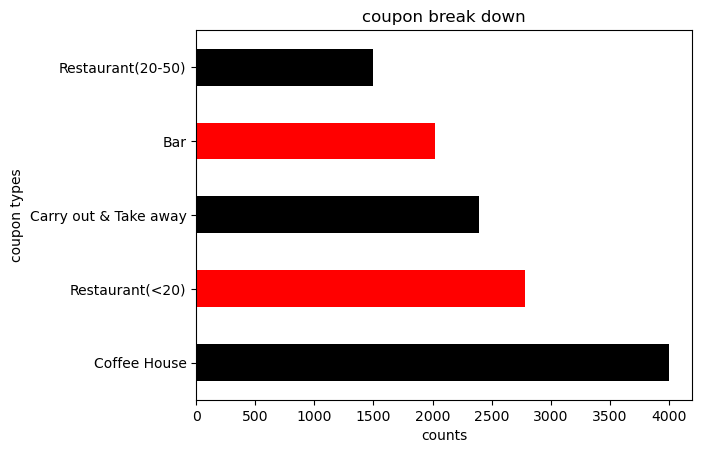

In [10]:
#the following bar plot is designed to show the distribution of coupon across different type
data['coupon'].value_counts().plot(kind='barh', color=['black', 'red', 'black', 'red', 'black'])
plt.title("coupon break down")
plt.xlabel("counts")
plt.ylabel("coupon types")

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

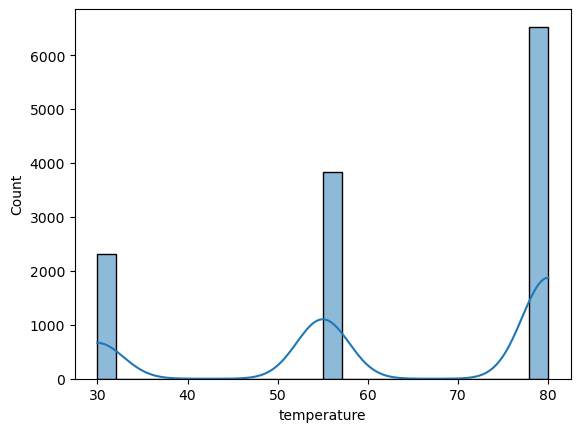

In [11]:
#the following seaborn histplot is intended to show the distribution of templerature
sns.histplot(data=data, x="temperature", kde=True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
## create a new dataframe for this question
df2 = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [17]:
proportion = df2['Y'].value_counts(normalize=True).sort_index() * 100
print(proportion[1])
# What proportion of bar coupons were accepted         ]

41.00148735746158


In [18]:
##total bar coupon issed, the actual number is 2017
data[data['coupon']=='Bar']['coupon'].count()


2017

<Axes: xlabel='coupon', ylabel='Percent'>

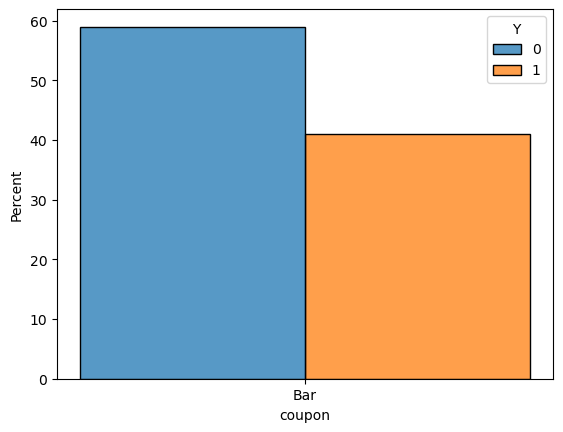

In [19]:
##percentage breakdown of acceptance rate of Bar coupon, the acceptance rate is lower than rejection rate
sns.histplot(df2, x="coupon", hue="Y", stat="percent", multiple="dodge", shrink=.8)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
#['never' 'less1' '1~3' 'gt8' '4~8']
q3a = df2[df2['Bar'].str.contains('never|less1|1~3')]
q3aresult = q3a['Y'].value_counts(normalize=True).sort_index() * 100
q3b = df2[df2['Bar'].str.contains('gt8|4~8')]
q3bresult = q3b['Y'].value_counts(normalize=True).sort_index() * 100
q3aXlabel = 'less than or equal to 3 times visiting Bar'
q3bXlabel = 'more than 3 times visiting Bar'
print(q3aXlabel)
print(q3aresult[1])
print(q3bXlabel)
print(q3bresult[1])

less than or equal to 3 times visiting Bar
37.073707370737075
more than 3 times visiting Bar
76.88442211055276


([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

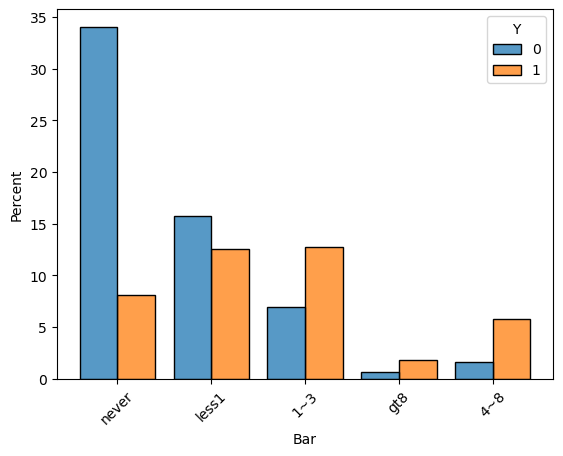

In [21]:
##percentage breakdown of drivers having Bar coupon with acceptance and rejection sub category
sns.histplot(df2, x="Bar", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

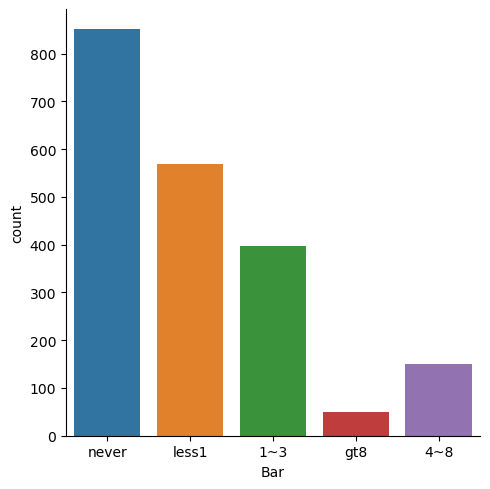

In [22]:
sns.catplot(data=df2, x="Bar",  kind='count')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
#['never' 'less1' '1~3' 'gt8' '4~8']
#['21' '46' '26' '31' '41' '50plus' '36' 'below21']
q4 = df2.loc[df2['Bar'].str.contains('1~3|gt8|4~8') & df2['age'].str.contains('46|26|31|41|50plus|36') ]
q4result = q4['Y'].value_counts(normalize=True).sort_index() * 100
q4Xlabel = 'more than 1 time visiting Bar and age over 25'

print(q4Xlabel)
print(q4result[1])


more than 1 time visiting Bar and age over 25
69.52380952380952


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
#['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
q5 = df2.loc[df2['Bar'].str.contains('1~3|gt8|4~8') & df2['passanger'].str.contains('Friend(s)|Partner') & df2['occupation'] !='Farming Fishing & Forestry']
q5result = q5['Y'].value_counts(normalize=True).sort_index() * 100
q5Xlabel = 'more than 1 time visiting Bar and with passengers not a kid and not farming fishing or forestry'

print(q5Xlabel)
print(q5result[1])

more than 1 time visiting Bar and with passengers not a kid and not farming fishing or forestry
41.00148735746158


C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_6996\3751322289.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  q5 = df2.loc[df2['Bar'].str.contains('1~3|gt8|4~8') & df2['passanger'].str.contains('Friend(s)|Partner') & df2['occupation'] !='Farming Fishing & Forestry']


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [31]:
#['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
#maritalStatus
#['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
##['21' '46' '26' '31' '41' '50plus' '36' 'below21']
#['never' '4~8' '1~3' 'gt8' 'less1']
#['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
#'$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
#'Less than $12500']
q6 = df2.loc[(df2['Bar'].str.contains('1~3|gt8|4~8') & df2['passanger'].str.contains('Friend(s)|Partner') & df2['maritalStatus'] !='Widowed') | (df2['Bar'].str.contains('1~3|gt8|4~8') & df2['age'].str.contains('21|26')) | (df2['RestaurantLessThan20'].str.contains('gt8|4~8') & df2['income'].str.contains('$37500 - $49999|$12500 - $24999|$25000 - $37499|Less than $12500'))]
q6result = q6['Y'].value_counts(normalize=True).sort_index() * 100
q6Xlabel = 'acceptance rate of less than or equal to 3 times of Bar'
print(q6Xlabel)
print(q6result[1])

acceptance rate of less than or equal to 3 times of Bar
41.00148735746158


C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_6996\823763301.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  q6 = df2.loc[(df2['Bar'].str.contains('1~3|gt8|4~8') & df2['passanger'].str.contains('Friend(s)|Partner') & df2['maritalStatus'] !='Widowed') | (df2['Bar'].str.contains('1~3|gt8|4~8') & df2['age'].str.contains('21|26')) | (df2['RestaurantLessThan20'].str.contains('gt8|4~8') & df2['income'].str.contains('$37500 - $49999|$12500 - $24999|$25000 - $37499|Less than $12500'))]


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<Axes: >

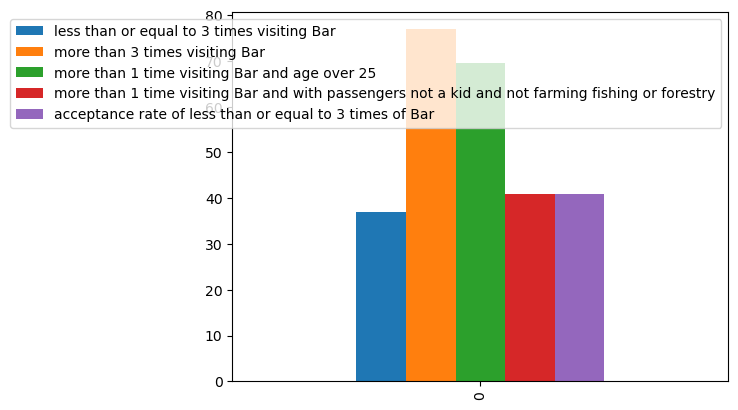

In [33]:
data2 = [{q3aXlabel:q3aresult[1],q3bXlabel:q3bresult[1],q4Xlabel:q4result[1],q5Xlabel:q5result[1],q6Xlabel:q6result[1]}]
df7 = pd.DataFrame(data2)

df7.plot(kind='bar')
#the finding is that 
#1 ) for drivers visiting the bar 3 times regardless the age, they are more likely to use the bar coupons
#2) for drivers visiting the bar 1 or more per months with age over 25, they are more likely to use the bar coupons
# the percentage of the above 2 groups have almost double chances to use the coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
## create a new dataframe for this question
df3 = data[data['coupon']=='Coffee House']

In [39]:
proportion = df3['Y'].value_counts(normalize=True).sort_index() * 100
print(proportion[1])
# What proportion of bar coupons were accepted, the general acceptance rate is higher for Coffee House   

49.92492492492492


In [40]:
##total Coffee House coupon issed, the actual number is 39916, it is much more than bar coupons
data[data['coupon']=='Coffee House']['coupon'].count()

3996

<Axes: xlabel='coupon', ylabel='Percent'>

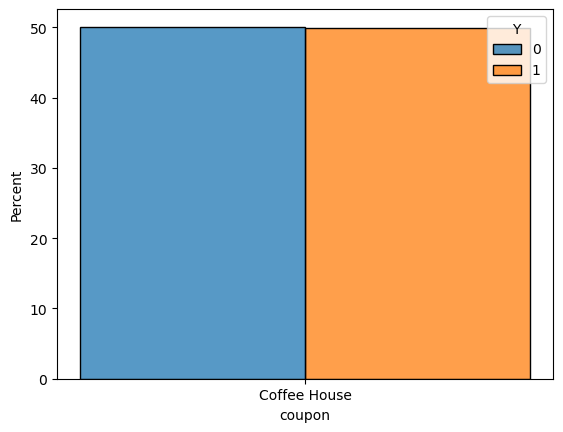

In [41]:
##percentage breakdown of acceptance rate of Coffee House coupon, the acceptance rate is 50%, 
sns.histplot(df3, x="coupon", hue="Y", stat="percent", multiple="dodge", shrink=.8)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '(Male, 50plus)'),
  Text(0.0, 0, '(Female, 21)'),
  Text(2.0, 0, '(Female, 31)'),
  Text(4.0, 0, '(Female, 41)'),
  Text(6.0, 0, '(Female, 50plus)'),
  Text(8.0, 0, '(Male, 21)'),
  Text(10.0, 0, '(Male, 31)'),
  Text(12.0, 0, '(Male, 41)'),
  Text(14.0, 0, '(Male, 50plus)'),
  Text(16.0, 0, '')])

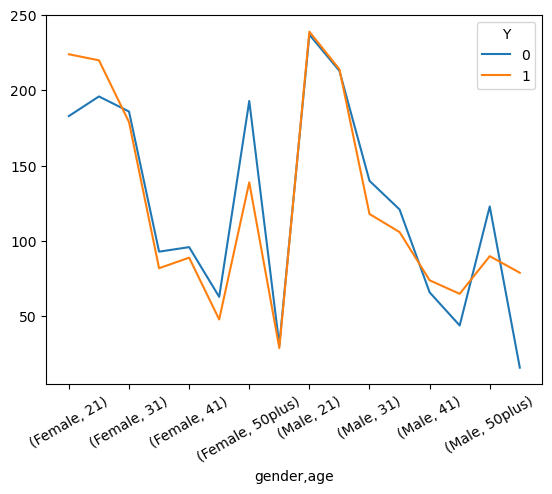

In [43]:
df3.groupby(['gender','age','Y'])['Y'].size().unstack(level=2).plot()
plt.xticks(rotation=30)
## young people such as 21 interest to go to Coffee House, for female they are more willing to use the coupon

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

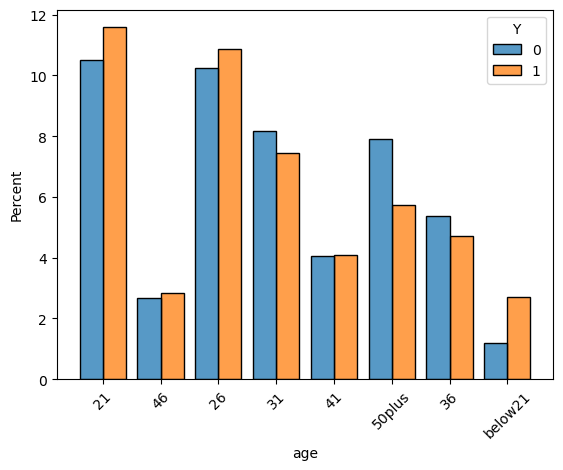

In [61]:
sns.histplot(df3, x="age", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)
#young age 21, 26 are more willing to use the coupon for Coffee House

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(-5.0, 0, '(Some college - no degree, 36)'),
  Text(0.0, 0, '(Associates degree, 21)'),
  Text(5.0, 0, '(Associates degree, 50plus)'),
  Text(10.0, 0, '(Bachelors degree, 41)'),
  Text(15.0, 0, '(Graduate degree (Masters or Doctorate), 26)'),
  Text(20.0, 0, '(Graduate degree (Masters or Doctorate), 50plus)'),
  Text(25.0, 0, '(High School Graduate, 41)'),
  Text(30.0, 0, '(Some High School, 31)'),
  Text(35.0, 0, '(Some college - no degree, 36)'),
  Text(40.0, 0, ''),
  Text(45.0, 0, '')])

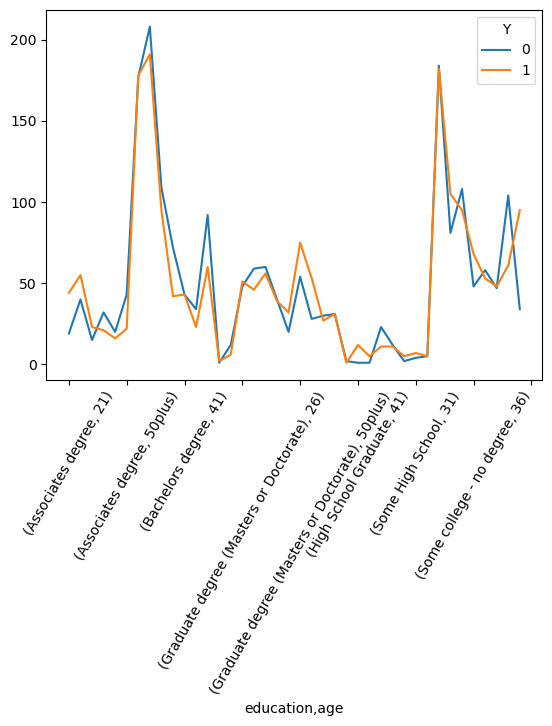

In [46]:
#education	occupation	income
df3.groupby(['education','age','Y'])['Y'].size().unstack(level=2).plot()
plt.xticks(rotation=60)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, '(Female, $100000 or More)'),
  Text(2.5, 0, ''),
  Text(5.0, 0, '(Female, $62500 - $74999)'),
  Text(7.5, 0, ''),
  Text(10.0, 0, '(Male, $12500 - $24999)'),
  Text(12.5, 0, ''),
  Text(15.0, 0, '(Male, $75000 - $87499)'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

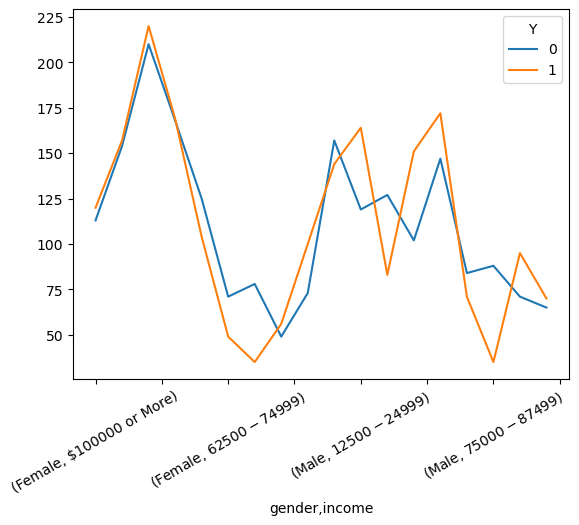

In [52]:
df3.groupby(['gender','income','Y'])['Y'].size().unstack(level=2).plot()
plt.xticks(rotation=30)

([0, 1, 2],
 [Text(0, 0, 'No Urgent Place'), Text(1, 0, 'Home'), Text(2, 0, 'Work')])

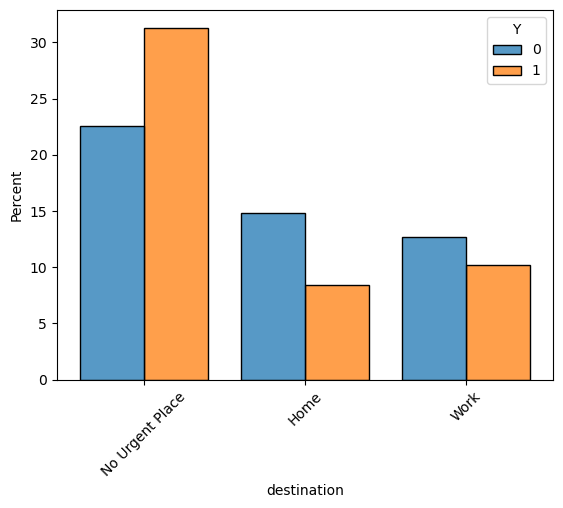

In [62]:
#if the drivers are not going to urgent place, they are more likely to use the coupons
sns.histplot(df3, x="destination", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '4~8'),
  Text(3, 0, '1~3'),
  Text(4, 0, 'gt8')])

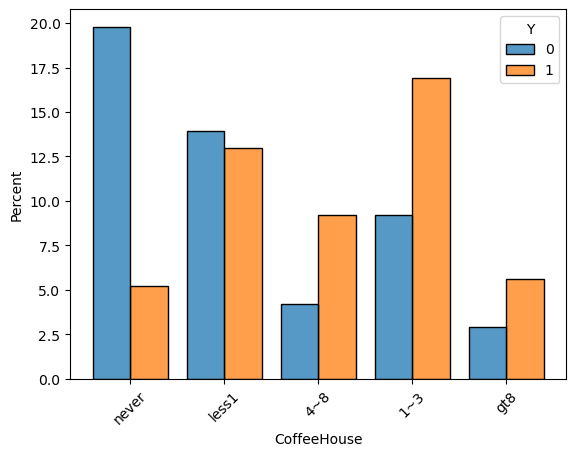

In [64]:
# we found that if drivers are going to Coffee House 1~8 times or more, they are more happy to use the coupon. 
#This is specially true for 1 to 3 times
sns.histplot(df3, x="CoffeeHouse", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

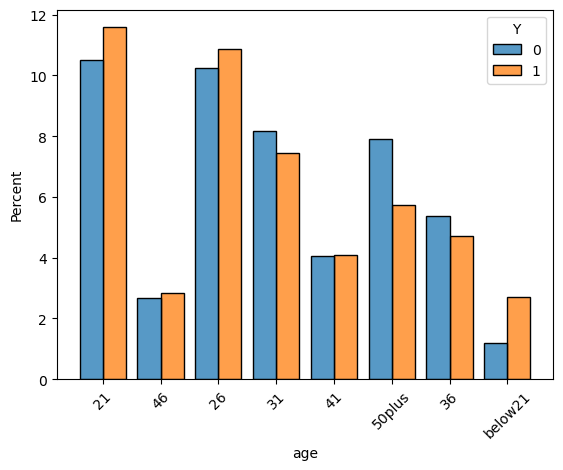

In [55]:
sns.histplot(df3, x="age", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, '$62500 - $74999'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$75000 - $87499'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

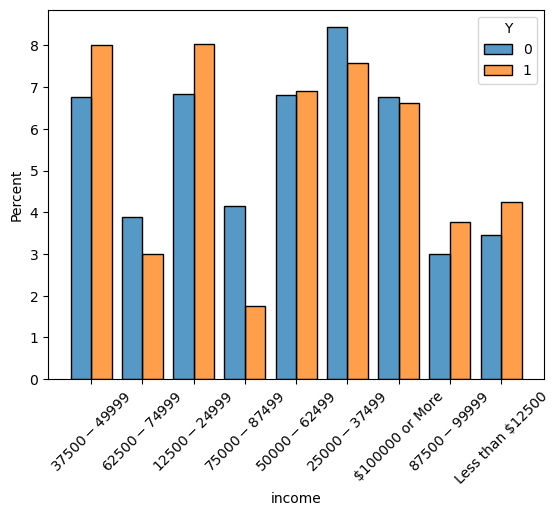

In [56]:
sns.histplot(df3, x="income", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Friend(s)'),
  Text(1, 0, 'Kid(s)'),
  Text(2, 0, 'Alone'),
  Text(3, 0, 'Partner')])

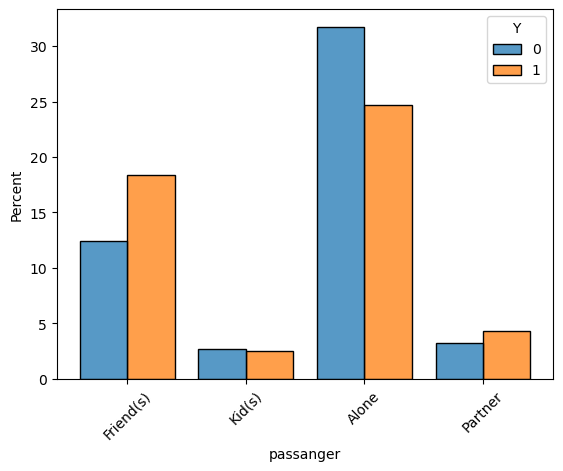

In [63]:
# if the passanger on the cars are friends and partners, the drivers are likely to use the coupon.
sns.histplot(df3, x="passanger", hue="Y", stat="percent", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

In [ ]:
#the final finding for coupon Coffee House is that 
#1 ) for drivers visiting the CoffeeHouse more frequently, they are using the coupons. THe highest rate actually 
#is for those who are visiting 1 to 3 times. 
#2 ) for drivers who have friend passengers, they are more likely to use the coupon. Next is if partner is sitting on the car
#3) if the drivers are not urgent, they are more likely to use the coffee house coupons